# Assignment 6: Neural Network (80 pts)


There are several goals of this Assignment:

1. You can implement fully connected neural network (FNN) and convolutional neural network (CNN) using Python.

2. We want to verify that CNN works better than FNN in image classification task.

3. We want to analyze how the neural network structure and batch_size affect the test accuracy. 

Remark: There are many factors affecting the test performance. Due to the computation limitation, we cannot analyze all of them. 

**You are allowed to use either Tensorflow or PyTorch. If you fail to install modules, feel free to use Google Colab.**

### Grading item: Please restart the kernel and run all before you submit. (5 pts)

## Import all required libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import numpy as np

## Load CIFAR10 Data

Load training and test samples from cifar10 dataset. Then normalize pixel values to be between 0 and 1 by dividing 255.0.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

## Data preparation for fully connected neural networks (15 pts)

Before we use convolutional neural network for image classification task, people used fully connected neural networks. In this section, we will prepare the data for FNN.

To implement FNN, we require a dataset which is a 2D numpy array where each row represents each sample and each column is a features. For image dataset, we will have 3D numpy array (grey images) or 4D numpy array (color images). Our goal is to reshaping 3D/4D numpy array to 2D numpy array such that each row is one image and columns are pixel values.

Simplification: For grey images, you can assume the shape is (m,d1,d2) where m is the number of images, d1 and d2 are the numbers of pixels on each side. For color images, you can assume the shape is (m,d1,d2,r) where m, d1, d2 have the same meaning as before and r is the number of color channels (usually r=3 or 4).

Please write a function to do this step. Your function should work for all image datasets (both grey and color images). Detailed docstring is required to explain your function. You must include the shape of your inputs and outputs when you write the docstring.

### Grading policy

1. The correctness of your function will be checked by test examples. (10 pts)

2. Detailed docstring and comments are well written. (5 pts)


**Later, you will use the function you write to generate inputs that is used to train your FNN models.**

In [4]:
def image_reshape(images):
    """
    reshape a 3D or 4D numpy array (image dataset) to a 2D numpy array 
    
    argument: 3D or 4D numpy array representing the images
        for grayscale images, the shape is (m, d1, d2)
          - m: number of images
          - d1, d2: height and width of each image
        for color images, the shape is (m, d1, d2, r)
          - m: number of images
          - d1, d2: height and width of each image
          - r: number of color channels 
    
    returns
        a 2D numpy array of shape (m, d1 * d2 * r)
        - m: number of images
        - d1 * d2 * r: number of pixels per image (flattened for FNN input)
    """
    
    #check if the input is a 3D (grayscale) or 4D (color) array
    if len(images.shape) == 3:
        # flatten each image into a 1D vector of size d1 * d2
        m, d1, d2 = images.shape
        return images.reshape(m, d1 * d2)
    
    elif len(images.shape) == 4:
        #flatten each image into a 1D vector of size d1 * d2 * r
        m, d1, d2, r = images.shape
        return images.reshape(m, d1 * d2 * r)


In [13]:
# test example 1: (2 pts)
X1 = np.arange(24).reshape(3,2,4)
image_reshape(X1)

# Passing X1 to your function will return 
# array([[ 0,  1,  2,  3,  4,  5,  6,  7],
#        [ 8,  9, 10, 11, 12, 13, 14, 15],
#        [16, 17, 18, 19, 20, 21, 22, 23]])

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [14]:
# test example 2: (3 pts)
X2 = np.arange(48).reshape(3,2,4,2)
image_reshape(X2)
# Passing X2 to your function will return 
# array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
#        [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
#        [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [7]:
# test example 3: (5 pts)
X_train = image_reshape(x_train)
idx = 1
np.allclose(X_train[1], x_train[1].flatten())

# let me explain this example further,
# train_images is the training images obtained from loading CIFAR10 data
# passing train_images to the function gives X_train.
#
#
# Notice that X_train and train_images are variables I defined, you may have different names.
# image_reshape is my function, you may also have different function name
# 
# Once you adjust variable names and function names, there is no error raised
# the output of this test example is True

True

## Construct your FNN model (5 pts)

In this section, you will construct a fully connected neural network. You only need to create the model by calling `tensorflow.models.Sequential` (other methods are also acceptable), and you do not need to train the model.

**Model:** This Neural network contains three hidden layers with number of neurons 50, 50, 50, respectively. The activation function is ReLU and you should use "he_normal" initialization for all hidden layers. 

In [8]:
def create_fnn(input_shape):
    """
    create a fully connected neural network (FNN)
    
    argument
    the shape of the input data (e.g., (d1 * d2 * r,) for flattened images
    
    returns
    model (tensorflow.keras.Model) the constructed neural network model.
    """
    model = models.Sequential()
    
    #input layer - flattened input 
    model.add(layers.Input(shape=input_shape))
    
    #first hidden layer with 50 neurons, ReLU activation, and He normal initialization
    model.add(layers.Dense(50, activation='relu', kernel_initializer='he_normal'))
    
    #second hidden layer with 50 neurons, ReLU activation, and He normal initialization
    model.add(layers.Dense(50, activation='relu', kernel_initializer='he_normal'))
    
    #third hidden layer with 50 neurons, ReLU activation, and He normal initialization
    model.add(layers.Dense(50, activation='relu', kernel_initializer='he_normal'))
    
    #output layer 
    model.add(layers.Dense(10, activation='softmax'))
    
    return model


input_shape = (3072,)  # 32x32 pixels and 3 color channels
fnn = create_fnn(input_shape)

## Construct your CNN models (10 pts, 5 pts each model)

In this section, you will construct two convolutional neural networks. You do not need to train the models. Just define them using `tensorflow.models.Sequential`.

I do not have any instructions on the construction of your models. You should define two models and your models should be different. Feel free to change the neural network structure, kernel size, number of neurons, and etc. Please do not use very complicated model, because you will reach computation limitation. Your model should be different from the model in my lecture notes.

**Suggestion**: It is better to think about a question first, and then determine model structure. For example, suppose that you want to understand how the number of convolution layers affects the test accuracy, then you can define two models which contain different numbers of convolution layers. To make the comparison fair, you should make other factors the same. Try to think about the question you are interested in and design the models.


In [9]:
def create_cnn_1(input_shape):
    """
    creates a convolutional neural network (CNN) with one convolutional layer
    
    argument
    input_shape (tuple) shape of the input data 
    
    returns
    model (tensorflow.keras.Model) the constructed CNN model
    """
    model = models.Sequential()
    
    #input layer with Conv2D + MaxPooling
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    #flatten the output of the convolutional layers
    model.add(layers.Flatten())
    
    #fully connected layer
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal'))
    
    #output layer for classification (10 classes for CIFAR-10)
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

def create_cnn_2(input_shape):
    """
   creates a convolutional neural network (CNN) with two convolutional layer
    
    argument
    input_shape (tuple) shape of the input data 
    
    returns
    model (tensorflow.keras.Model) the constructed CNN model
    """
    model = models.Sequential()
    
    #input layer with Conv2D + MaxPooling
    model.add(layers.Input(shape=input_shape))
    
    #first convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    #second convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    #flatten the output of the convolutional layers
    model.add(layers.Flatten())
    
    #fully connected layer
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal'))
    
    #output layer for classification (10 classes for CIFAR-10)
    model.add(layers.Dense(10, activation='softmax'))
    
    return model


input_shape = (32, 32, 3)
cnn_1 = create_cnn_1(input_shape)
cnn_2 = create_cnn_2(input_shape)


## Train your model (15 pts)

In this part, you should write a function to train your models. Your function should take the model, training samples, test samples, and batch_size as inputs and returns test accuracy after each epoch. Detailed function docstring is required. Your function should **NOT** include any global variables.

Comments:
1. Since this is a classification problem, you can use the same loss function and metric for all different models. You should determine the loss function and metric.

2. Please use epochs=5, otherwise it takes long to train your models.

### Grading policy:

1. The function has detailed docstring and comments. (5 pts)

2. The correctness of your code will be checked in the next section. (10 pts)


In [10]:
def train_cnn(model, x_train, y_train, x_test, y_test, batch_size):
    """
    train the model and return the test accuracy after each epoch
    
    arguments
    - model (tf.keras.Model) the neural network model to be trained
    - x_train (numpy.ndarray) the training input samples, shape (m, height, width, channels)
    - y_train (numpy.ndarray) the training labels, shape (m,)
    - x_test (numpy.ndarray) the test input samples, shape (m, height, width, channels)
    - y_test (numpy.ndarray) the test labels, shape (m,)
    - batch_size (int) the number of samples per gradient update.
    
    returns
    - test_accuracies (list): A list of test accuracies after each epoch.
    """

    y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)
    
    test_accuracies = []

    #compile the model if not already compiled
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    #train the model for 5 epochs
    for epoch in range(5):
        print(f"Epoch {epoch + 1}/5")

        #train the model for one epoch
        model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=1, verbose=1)

        #evaluate the model on the test set and get the test accuracy
        test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot, verbose=0)
        test_accuracies.append(test_accuracy)

        print(f"Test accuracy after epoch {epoch + 1}: {test_accuracy:.4f}")
    
    return test_accuracies

def train_fnn(model, x_train, y_train, x_test, y_test, batch_size):
    
    #flatten the input data: (None, 32, 32, 3) -> (None, 3072)
    x_train_flat = x_train.reshape(-1, 32 * 32 * 3)
    x_test_flat = x_test.reshape(-1, 32 * 32 * 3)
    

    y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)
    
    test_accuracies = []

    #compile the model if not already compiled
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    #train the model for 5 epochs
    for epoch in range(5):
        print(f"Epoch {epoch + 1}/5")

        #train the model for one epoch
        model.fit(x_train_flat, y_train_one_hot, batch_size=batch_size, epochs=1, verbose=1)

        #evaluate the model on the test set and get the test accuracy
        test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_one_hot, verbose=0)
        test_accuracies.append(test_accuracy)

        print(f"Test accuracy after epoch {epoch + 1}: {test_accuracy:.4f}")
    
    return test_accuracies


batch_size = 32
test_accuracies_cnn1 = train_cnn(cnn_1, x_train, y_train, x_test, y_test, batch_size)
test_accuracies_cnn2 = train_cnn(cnn_2, x_train, y_train, x_test, y_test, batch_size)
test_accuracies_fnn = train_fnn(fnn, x_train, y_train, x_test, y_test, batch_size)

print("cnn 1 \n")
print(test_accuracies_cnn1)
print("cnn 2 \n")
print(test_accuracies_cnn2)
print("fnn \n")
print(test_accuracies_fnn)


Epoch 1/5


1563/1563 [==============================] - 34s 21ms/step - loss: 1.4884 - accuracy: 0.4692
Test accuracy after epoch 1: 0.5276
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1721 - accuracy: 0.5896
Test accuracy after epoch 2: 0.5995
Epoch 3/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0553 - accuracy: 0.6302
Test accuracy after epoch 3: 0.6100
Epoch 4/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9704 - accuracy: 0.6629
Test accuracy after epoch 4: 0.6345
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9097 - accuracy: 0.6841
Test accuracy after epoch 5: 0.6437
Epoch 1/5
1563/1563 [==============================] - 39s 24ms/step - loss: 1.3156 - accuracy: 0.5330
Test accuracy after epoch 1: 0.6169
Epoch 2/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9665 - accuracy: 0.6619
Test accuracy after epoch 2: 0.6717
Epoch 3/5
1563/1563 [===

## Numeircal experiments: (10 pts)

Now we can do our numerical experiments. Remember that we have three models (1 FNN, 2 CNNs), You should try different batch sizes for each model, see below:

- Batch_size = 16 or 64.

Now, we have 6 different combinations. Please visualize all test accuracies in 1 plot. See my sample plot below. 


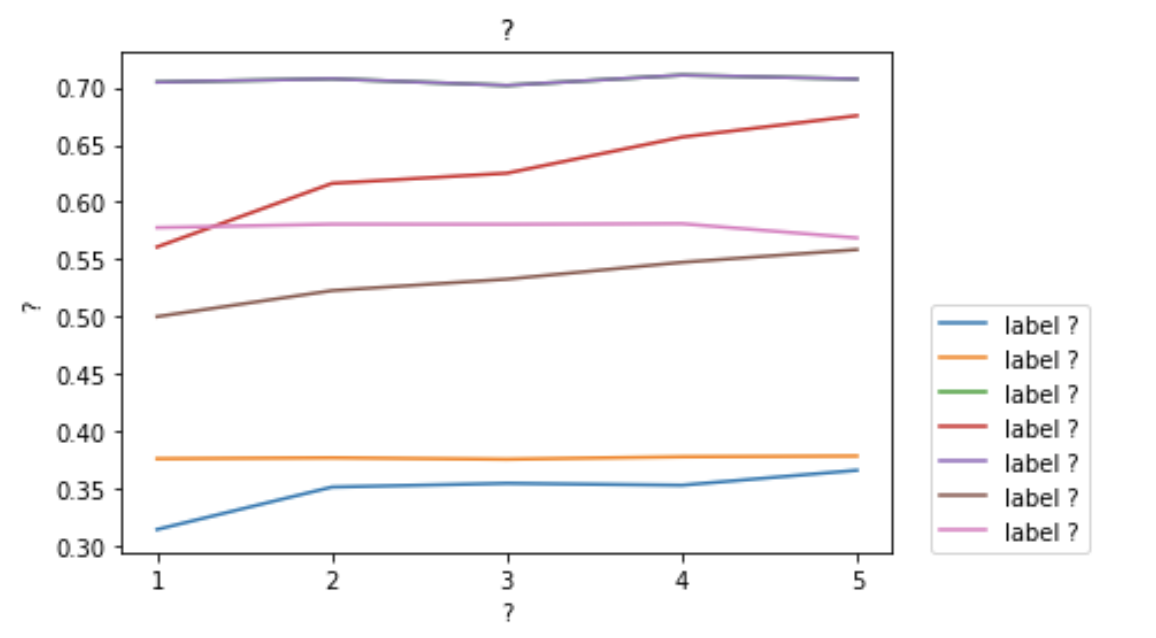

I do not have any legends, labels, title, and etc in my plot, you should include informative legends, labels, title, and etc. You can also add other features (e.g. markers) to create nice plot. You are welcome to use either matplotlib or seaborn to draw your plot.


**Important remark: It takes me 14 minutes to train 6 models. If your training time is longer than you expect, please try to use simple CNN models.** 


### Grading policy:

1. Visualization includes informative legends, labels, titles and etc. (10 pts)

2. The visualization should be similar to my sample plot. This item can verify the correctness of your function.  

Epoch 1/5
3125/3125 [==============================] - 12s 4ms/step - loss: 1.6539 - accuracy: 0.4062
Test accuracy after epoch 1: 0.4071
Epoch 2/5
3125/3125 [==============================] - 14s 5ms/step - loss: 1.6339 - accuracy: 0.4129
Test accuracy after epoch 2: 0.4144
Epoch 3/5
3125/3125 [==============================] - 12s 4ms/step - loss: 1.6177 - accuracy: 0.4184
Test accuracy after epoch 3: 0.4232
Epoch 4/5
3125/3125 [==============================] - 13s 4ms/step - loss: 1.6100 - accuracy: 0.4208
Test accuracy after epoch 4: 0.4302
Epoch 5/5
3125/3125 [==============================] - 13s 4ms/step - loss: 1.6007 - accuracy: 0.4253
Test accuracy after epoch 5: 0.4317
Epoch 1/5
782/782 [==============================] - 4s 4ms/step - loss: 1.5468 - accuracy: 0.4450
Test accuracy after epoch 1: 0.4411
Epoch 2/5
782/782 [==============================] - 4s 6ms/step - loss: 1.5319 - accuracy: 0.4490
Test accuracy after epoch 2: 0.4353
Epoch 3/5
782/782 [=====================

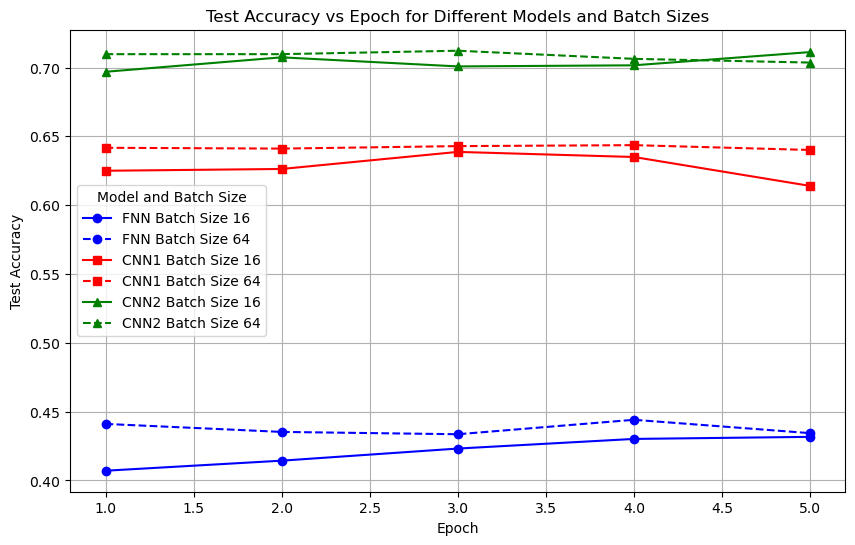

In [11]:
batch_sizes = [16, 64]

#prepare lists to store the test accuracies
test_accuracies_fnn_16 = train_fnn(fnn, x_train, y_train, x_test, y_test, batch_size=16)
test_accuracies_fnn_64 = train_fnn(fnn, x_train, y_train, x_test, y_test, batch_size=64)

test_accuracies_cnn1_16 = train_cnn(cnn_1, x_train, y_train, x_test, y_test, batch_size=16)
test_accuracies_cnn1_64 = train_cnn(cnn_1, x_train, y_train, x_test, y_test, batch_size=64)

test_accuracies_cnn2_16 = train_cnn(cnn_2, x_train, y_train, x_test, y_test, batch_size=16)
test_accuracies_cnn2_64 = train_cnn(cnn_2, x_train, y_train, x_test, y_test, batch_size=64)

plt.figure(figsize=(10, 6))

plt.plot(range(1, 6), test_accuracies_fnn_16, label="FNN Batch Size 16", marker='o', linestyle='-', color='blue')
plt.plot(range(1, 6), test_accuracies_fnn_64, label="FNN Batch Size 64", marker='o', linestyle='--', color='blue')

plt.plot(range(1, 6), test_accuracies_cnn1_16, label="CNN1 Batch Size 16", marker='s', linestyle='-', color='red')
plt.plot(range(1, 6), test_accuracies_cnn1_64, label="CNN1 Batch Size 64", marker='s', linestyle='--', color='red')

plt.plot(range(1, 6), test_accuracies_cnn2_16, label="CNN2 Batch Size 16", marker='^', linestyle='-', color='green')
plt.plot(range(1, 6), test_accuracies_cnn2_64, label="CNN2 Batch Size 64", marker='^', linestyle='--', color='green')

plt.title("Test Accuracy vs Epoch for Different Models and Batch Sizes")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend(title="Model and Batch Size")
plt.grid(True)

plt.savefig('accuracy.png')

plt.show()

## Repeate your experiments: (10 pts)

Since there is randomness in your experiment such as the random initialization of your parameters (`he_normal`) and random shuffle of your dataset (`model.fit`), we usually repeat previous experiments many times and tehn average to alleviate the effect of randomness. We can also compute the standard deviation to measure the variation. We expect small standard deviation and it means that randomness in your experiment does not change your test accuracy too much.

You may notice that training CNN is time consuming. To save your time, we will do this part only for FNN. 

Please repeat your previous experiments 5 times for your FNN model. Specifically, you should repeat the following process 5 times: create your FNN model, select batch_size = 16/64, train your model and record test accuracy. 

Then, compute average test accuracy (1 decimal place) and standard deviation (1 decimal places) after each epoch and fill in the following table. 

Report the average test accuracy and standard deviation in the following table. Double click this cell and then you are able to edit the table. You can simply replace the numbers using the quantities you compute. 


|                      |   Epoch 1    |   Epoch 2    |   Epoch 3    |   Epoch 4    |   Epoch 5    |
|:--------------------:|:------------:|:------------:|:------------:|:------------:|:------------:|
|    batch_size = 16   |42.8%$\pm$1.1%|43.0%$\pm$0.9%|43.1%$\pm$0.8%|42.6%$\pm$0.8%|43.1%$\pm$0.9%|
|    batch_size = 64   |44.2%$\pm$0.4%|44.1%$\pm$0.2%|44.1%$\pm$0.3%|44.5%$\pm$0.2%|44.2%$\pm$0.2%|

**You should use the functions you write before.**

### Grading policy:
1. Add comments to your code. (5 pts)
2. Finish the table. (5 pts)

In [12]:
def run_fnn_experiment(fnn, x_train, y_train, x_test, y_test, batch_size):
    accuracies_per_epoch = []

    for _ in range(5):  
        test_accuracies = train_fnn(fnn, x_train, y_train, x_test, y_test, batch_size)
        accuracies_per_epoch.append(test_accuracies)
    
   
    accuracies_per_epoch = np.array(accuracies_per_epoch)

    #calculate the mean and standard deviation for each epoch
    avg_accuracies = np.mean(accuracies_per_epoch, axis=0)
    std_accuracies = np.std(accuracies_per_epoch, axis=0)

    return avg_accuracies, std_accuracies

batch_size_16_avg, batch_size_16_std = run_fnn_experiment(fnn, x_train, y_train, x_test, y_test, batch_size=16)
batch_size_64_avg, batch_size_64_std = run_fnn_experiment(fnn, x_train, y_train, x_test, y_test, batch_size=64)


import pandas as pd

epochs = [1, 2, 3, 4, 5]
results = {
    "Epoch": epochs,
    "Avg Accuracy (Batch Size 16)": batch_size_16_avg,
    "Std Accuracy (Batch Size 16)": batch_size_16_std,
    "Avg Accuracy (Batch Size 64)": batch_size_64_avg,
    "Std Accuracy (Batch Size 64)": batch_size_64_std,
}

df_results = pd.DataFrame(results)

print(df_results)

Epoch 1/5
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5680 - accuracy: 0.4349
Test accuracy after epoch 1: 0.4264
Epoch 2/5
3125/3125 [==============================] - 14s 4ms/step - loss: 1.5688 - accuracy: 0.4334
Test accuracy after epoch 2: 0.4213
Epoch 3/5
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5618 - accuracy: 0.4384
Test accuracy after epoch 3: 0.4305
Epoch 4/5
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5562 - accuracy: 0.4377
Test accuracy after epoch 4: 0.4108
Epoch 5/5
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5540 - accuracy: 0.4372
Test accuracy after epoch 5: 0.4230
Epoch 1/5
3125/3125 [==============================] - 14s 4ms/step - loss: 1.5492 - accuracy: 0.4424
Test accuracy after epoch 1: 0.4346
Epoch 2/5
3125/3125 [==============================] - 14s 4ms/step - loss: 1.5479 - accuracy: 0.4443
Test accuracy after epoch 2: 0.4245
Epoch 3/5
3125/3125 [=============

## Conclusion: (10 pts)

Please list at least 3 informative conclusions based on your numerical results

1. The standard deviation is lower over a larger batch size meaing it is more consistent.
2.  A larger batch size typically means slightly higher overall accuracy.
3. A smaller batch size could offer a better generalized solution, by allowing the model to escape local minima.